# Conteúdo adaptado do Portal Ciência dos Dados
### # **Instagram - Ciencia dos Dados** 
<a href="http://instagram.com/cienciadosdados">instagram.com/cienciadosdados</a>


# **O que são Ensembles?**


![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-10-14-30-00.png)

* O aprendizado por Ensemble é uma técnica de aprendizado em que **vários modelos individuais se combinam** para criar uma **máquina preditiva mestre.**

* Um Ensemble nada mais é do que a técnica para combinar vários modelos preditivos individuais para chegar ao modelo preditivo final.

* O objetivo para as técnicas Ensemble é melhorar a previsibilidade em modelos combinando vários modelos ou treinando diferentes conjuntos de dados com um único modelo para fazer um modelo muito forte.

* Os métodos de ensemble mais populares na prática são **Boosting, Bagging e Stacking.**

* Os métodos de ensemble são adequados para problemas de regressão e classificação, onde são usados ​​para reduzir a variância e o viés (bias) para aumentar a precisão dos modelos.

![](https://editor.analyticsvidhya.com/uploads/35982simple%20representation%20of%20Ensembel.png)

Aqui, os modelos A, B, C e D podem ser qualquer um dos seguintes algoritmos de Aprendizado de Máquina, pois estamos familiarizados com **Regressão Logística, Árvore de Decisão, SVM**, etc. 

Faz sentido para nós que um grupo de alunos (fraco) se reúne e forma uma comunidade de alunos mais forte, como resultado do aumento da precisão de qualquer modelo de aprendizado de máquina.

A ideia por trás do **Ensemble é combinar os resultados de vários modelos (por exemplo, todas as árvores de decisão)** para obter um resultado generalizado. 

Aqui está uma pergunta: se você criar todos os modelos no mesmo conjunto de dados e combiná-los, isso será útil? Há uma grande chance de que esses modelos forneçam o mesmo resultado, pois estão obtendo a mesma entrada. Então, como podemos resolver esse problema? Uma das técnicas é o bootstrapping.

**Bootstrapping** é uma técnica de amostragem na qual criamos subconjuntos de observações a partir do conjunto de dados original, com substituição . O tamanho dos subconjuntos é igual ao tamanho do conjunto original.
Note: Os algorítmos de ML fazem isso de forma automática.

A técnica de **Bagging (ou Bootstrap Aggregating)** usa esses subconjuntos (bolsas) para se ter uma ideia justa da distribuição (conjunto completo). O tamanho dos subconjuntos criados para ensacamento pode ser menor que o conjunto original.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/05/Screenshot-from-2018-05-08-13-11-49-768x580.png)

![](https://cienciadosdados.com/images/2021/ensemble.png)

# **==> Bagging**


![](https://www.researchgate.net/profile/Bernard-Chen/publication/269554356/figure/fig3/AS:467138126323716@1488385816918/A-decision-tree-based-bagging-model-for-GI-non-GI-gene-classification-A-A.png)
![](https://miro.medium.com/max/2000/1*zTgGBTQIMlASWm5QuS2UpA.jpeg)

**Bagging**: É o processo no qual se busca reduzir a variância e aumentar a precisão. Essa técnica consegue reduzir o overfitting, que foi um grande desafio em muitos modelos preditivos. No processo, são considerados um aluno fraco homogêneo (um modelo fraco) e os aprende independentemente uns dos outros(em paralelo) para depois se combinar seguindo o processo da média desses alunos (modelos).

Além disso, é classificado em dois tipos como **Bootstrapping e Agregação .**

1- A principal vantagem do método é que os alunos de base fraca são combinados para formar um único aluno forte, que é **mais estável do que alunos isolados.**

2 - Ele também elimina qualquer variação e **reduz o sobreajuste (overfiting)** dos modelos.

3 - Computacionalmente intenso (processamento na tora, na máxima...) é o maior desafio deste método.

### Bagging - Conjunto de árvores de decisão

O metaestimador de bagging é um algoritmo de ensembling que pode ser usado para problemas de classificação (BaggingClassifier) ​​e de regressão (BaggingRegressor). Ele segue a técnica típica de ensacamento para fazer previsões. A seguir estão as etapas para o algoritmo de metaestimador de bagging:

1. Subconjuntos aleatórios são criados a partir do conjunto de dados original (Bootstrapping).

2. O subconjunto do conjunto de dados inclui todos os recursos.

3. Um estimador de base especificado pelo usuário é ajustado em cada um desses conjuntos menores.

4. As previsões de cada modelo são combinadas para obter o resultado final.

### **Obs: Aula de Validação Cruzada:**

https://youtu.be/FI3RlY9AaVs

In [34]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

# Carregando os dados
arquivo = 'pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Definindo o número de trees
num_trees = 100
max_features = 6

# Separando os dados em folds
kfold = KFold(num_folds, shuffle= True, random_state = seed)

# Criando o modelo
modelo = BaggingClassifier(n_estimators = num_trees, max_features = max_features)
# Cross Validation
for score in ["accuracy", "precision", "recall"]:
        resultado = cross_val_score(modelo, X, Y, cv = kfold,scoring=score)
        if score == 'precision':
            precision = resultado.mean()
        elif score == 'recall':
            recall = resultado.mean()        
        print(f'{score}:{resultado}')
        print(f'Mean {score}:{resultado.mean() * 100}')
        
f1_score = (2 * precision * recall) / (precision + recall)
print(f'f1_score = {f1_score * 100}')


# Print do resultado
#print("Acurácia: %.3f" % (resultado.mean() * 100))

accuracy:[0.72727273 0.79220779 0.7012987  0.75324675 0.81818182 0.79220779
 0.63636364 0.76623377 0.80263158 0.72368421]
Mean accuracy:75.13328776486671
precision:[0.75       0.76190476 0.5        0.6        0.75       0.7
 0.57894737 0.79310345 0.47368421 0.75      ]
Mean precision:66.57639789127991
recall:[0.64516129 0.57692308 0.59259259 0.60869565 0.59259259 0.6
 0.44827586 0.57575758 0.5625     0.61290323]
Mean recall:58.1540186823775
f1_score = 62.08084913255353


### ExtraTree

Extremely Randomized Trees ou Árvores Extremamente Randomizadas. É um Algoritmo com um conjunto de árvores de decisão e está relacionado a outros conjuntos
de algoritmos de árvores de decisão, como agregação de bootstrap (bagging) e floresta aleatória.

O algoritmo Extra Trees funciona criando um grande número de árvores de decisão não ajustadas a partir do
conjunto de dados de treinamento. 

As previsões são feitas calculando a média da previsão das árvores de decisão no caso de regressão ou uso de votação por maioria no caso de classificação.

In [35]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier

# Carregando os dados
arquivo = 'pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Definindo o número de trees
num_trees = 100
max_features = 7

# Separando os dados em folds
kfold = KFold(num_folds, shuffle= True, random_state = seed)

# Criando o modelo
modelo = ExtraTreesClassifier(n_estimators = num_trees, max_features = max_features)

# Cross Validation
for score in ["accuracy", "precision", "recall"]:
        resultado = cross_val_score(modelo, X, Y, cv = kfold,scoring=score)
        if score == 'precision':
            precision = resultado.mean()
        elif score == 'recall':
            recall = resultado.mean()        
        print(f'{score}:{resultado}')
        print(f'Mean {score}:{resultado.mean() * 100}')
        
f1_score = (2 * precision * recall) / (precision + recall)
print(f'f1_score = {f1_score * 100}')

accuracy:[0.81818182 0.80519481 0.7012987  0.79220779 0.75324675 0.77922078
 0.68831169 0.80519481 0.77631579 0.71052632]
Mean accuracy:76.296992481203
precision:[0.76923077 0.83333333 0.5483871  0.64       0.76190476 0.75
 0.55555556 0.82142857 0.52631579 0.69230769]
Mean precision:68.98463570008562
recall:[0.58064516 0.57692308 0.62962963 0.69565217 0.59259259 0.6
 0.34482759 0.72727273 0.5625     0.58064516]
Mean recall:58.90688109118612
f1_score = 63.54869868243006


### Random Forest

Random Forest é uma extensão do Baggig Decision Tree. Amostras do dataset de treino são usadas com reposição, mas as árvores são criadas de uma forma que reduz a correlação entre classificadores individuais (Random Forest é um conjunto de árvores de decisão).

Random Forest é outro algoritmo de aprendizado de máquina de conjunto que segue a técnica de ensacamento. É uma extensão do algoritmo do estimador de bagging. Os estimadores de base em floresta aleatória são árvores de decisão. Ao contrário do metaestimador de ensacamento, a floresta aleatória seleciona aleatoriamente um conjunto de recursos que são usados ​​para decidir a melhor divisão em cada nó da árvore de decisão.

Olhando passo a passo, isso é o que um modelo de floresta aleatório faz:

1. Subconjuntos aleatórios são criados a partir do conjunto de dados original (bootstrapping).

2. Em cada nó da árvore de decisão, apenas um conjunto aleatório de recursos é considerado para decidir a melhor divisão.

3. Um modelo de árvore de decisão é ajustado em cada um dos subconjuntos.

4. A previsão final é calculada pela média das previsões de todas as árvores de decisão.

In [36]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Carregando os dados
arquivo = 'pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Definindo o número de trees
num_trees = 100
max_features = 2

# Separando os dados em folds
kfold = KFold(num_folds, shuffle= True, random_state = seed)

# Criando o modelo
modelo = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)

# Cross Validation
for score in ["accuracy", "precision", "recall"]:
        resultado = cross_val_score(modelo, X, Y, cv = kfold,scoring=score)
        if score == 'precision':
            precision = resultado.mean()
        elif score == 'recall':
            recall = resultado.mean()        
        print(f'{score}:{resultado}')
        print(f'Mean {score}:{resultado.mean() * 100}')
        
f1_score = (2 * precision * recall) / (precision + recall)
print(f'f1_score = {f1_score * 100}')

accuracy:[0.83116883 0.76623377 0.72727273 0.79220779 0.83116883 0.79220779
 0.7012987  0.79220779 0.82894737 0.73684211]
Mean accuracy:77.99555707450445
precision:[0.88461538 0.76190476 0.5483871  0.65217391 0.77272727 0.76190476
 0.61111111 0.76666667 0.55       0.73913043]
Mean precision:70.4862140353024
recall:[0.74193548 0.57692308 0.62962963 0.56521739 0.62962963 0.52
 0.31034483 0.6969697  0.625      0.5483871 ]
Mean recall:58.44036832687749
f1_score = 63.90055851505386


# **Parâmetros mais utilizados**


**n_estimators**:
It defines the number of decision trees to be created in a random forest.

Generally, a higher number makes the predictions stronger and more stable, but a very large number can result in higher training time.

**criterion**:
It defines the function that is to be used for splitting.
The function measures the quality of a split for each feature and chooses the best split.

**max_features** :
It defines the maximum number of features allowed for the split in each decision tree.
Increasing max features usually improve performance but a very high number can decrease the diversity of each tree.

**max_depth**:
Random forest has multiple decision trees. This parameter defines the maximum depth of the trees.

**min_samples_split**:
Used to define the minimum number of samples required in a leaf node before a split is attempted.
If the number of samples is less than the required number, the node is not split.

**min_samples_leaf**:
This defines the minimum number of samples required to be at a leaf node.
Smaller leaf size makes the model more prone to capturing noise in train data.

**max_leaf_nodes**:
This parameter specifies the maximum number of leaf nodes for each tree.
The tree stops splitting when the number of leaf nodes becomes equal to the max leaf node.

**n_jobs**:
This indicates the number of jobs to run in parallel.
Set value to -1 if you want it to run on all cores in the system.

**random_state**:
This parameter is used to define the random selection.
It is used for comparison between various models.

# **==> Boosting - Aprende com os erros dos outros modelos** 


![](https://editor.analyticsvidhya.com/uploads/26025ada1.png)

**Boosting**:  Método Ensemble mais amplamente utilizado e poderoso. Na verdade, ele foi projetado para problemas de classificação e posteriormente estendido para problema de regressão também. Esta é basicamente uma combinação de mais de 3 algoritmos fracos (alunos) para gerar um aluno forte.

Antes de prosseguirmos, aqui está outra pergunta para você: Se um ponto de dados for previsto incorretamente pelo primeiro modelo e depois pelo próximo (provavelmente todos os modelos), a combinação das previsões fornecerá melhores resultados? 

Essas situações são resolvidas por meio de reforço.

**Boosting** é um processo sequencial, **onde cada modelo subsequente tenta corrigir os erros do modelo anterior**. 

1. Um subconjunto é criado a partir do conjunto de dados original.
2. Inicialmente, todos os pontos de dados recebem pesos iguais.
3. Um modelo básico é criado neste subconjunto.
4. Este modelo é usado para fazer previsões em todo o conjunto de dados.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2015/11/dd1-e1526989432375.png)

5. Os erros são calculados usando os valores reais e os valores previstos.
6. As observações que são previstas incorretamente recebem pesos maiores.
(Aqui, os três pontos azuis mal classificados receberão pesos maiores)
7. Outro modelo é criado e as previsões são feitas no conjunto de dados.
(Este modelo tenta corrigir os erros do modelo anterior)

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2015/11/dd2-e1526989487878.png)

8. Da mesma forma, vários modelos são criados, cada um corrigindo os erros do modelo anterior.
9. O modelo final (aluno forte) é a média ponderada de todos os modelos (alunos fracos)

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/11/boosting10.png)

Assim, o algoritmo de reforço combina vários alunos fracos para formar um aluno forte. Os modelos individuais não teriam um bom desempenho em todo o conjunto de dados, mas funcionam bem para alguma parte do conjunto de dados. **Assim, cada modelo realmente impulsiona o desempenho do conjunto.**

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2015/11/dd4-e1526551014644.**png**)

## Algoritmos Boosting

###  AdaBoost

O boosting adaptativo ou AdaBoost é um dos algoritmos de boosting mais simples. Normalmente, as árvores de decisão são usadas para modelagem. Vários modelos sequenciais são criados, cada um corrigindo os erros do último modelo. AdaBoost atribui pesos às observações que são previstas incorretamente e o modelo subsequente trabalha para prever esses valores corretamente.

Abaixo estão as etapas para executar o algoritmo AdaBoost:

1. Inicialmente, todas as observações no conjunto de dados recebem pesos iguais.

2. Um modelo é construído em um subconjunto de dados.

3. Usando este modelo, as previsões são feitas em todo o conjunto de dados.

4. Os erros são calculados comparando as previsões e os valores reais.

5. Ao criar o próximo modelo, pesos maiores são dados aos pontos de dados que foram previstos incorretamente.

6. Os pesos podem ser determinados usando o valor de erro. Por exemplo, quanto maior o erro, maior é o peso atribuído à observação.

7. Este processo é repetido até que a função de erro não mude ou o limite máximo do número de estimadores seja atingido.

==> Vantagens e Desvantagens

Chegando às vantagens, o Adaboost é menos sujeito a sobreajuste, pois os parâmetros de entrada não são otimizados em conjunto. A precisão de classificadores fracos pode ser melhorada usando Adaboost. Hoje em dia, o Adaboost está sendo usado para classificar textos e imagens, em vez de problemas de classificação binária.

A principal desvantagem do Adaboost é que ele precisa de um conjunto de dados de qualidade. Dados com ruído e valores discrepantes devem ser evitados antes de adotar um algoritmo Adaboost.

In [1]:
# Importação de Pacotes
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Carregando o Dataset direto do Sklear
breast_cancer = load_breast_cancer()

# Separação das features (variáveis) e do Target
X = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)

# Transformação da Label em numérico
encoder = LabelEncoder()
binary_encoded_y = pd.Series(encoder.fit_transform(y))

# Separação ou Amostragem
train_X, test_X, train_y, test_y = train_test_split(X, binary_encoded_y, random_state = 1)

# Criar e trinamos a Máquina Preditiva
classifier = AdaBoostClassifier(n_estimators=1000)
classifier.fit(train_X, train_y)

# Predição com dados de Teste
prediction = classifier.predict(test_X)

#Avaliação da MP
confusion_matrix(test_y, prediction)

accuracy = accuracy_score(test_y, prediction)
print('AdaBoost Accuracy: ', accuracy)



AdaBoost Accuracy:  0.958041958041958


![](https://cienciadosdados.com/images/2021/Thumbs/adaboost.png)

### GBM - Gradient Boosting Machine

Os modelos em Gradient Boosting Machine são construídos sequencialmente e cada um desses modelos subsequentes tenta reduzir o erro do modelo anterior. **Mas a questão é como cada modelo reduz o erro do modelo anterior?** Isso é feito construindo o novo modelo sobre os erros ou resíduos das previsões anteriores.

Isso é feito para determinar se há algum padrão no erro que foi perdido pelo modelo anterior.


#### Passo 1

A primeira etapa é construir um modelo e fazer previsões sobre os dados fornecidos. Vamos voltar aos nossos dados, para o primeiro modelo, a meta será o valor da receita fornecido nos dados. Portanto, eu defini a meta como valores originais de Renda.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-25-12-24-34-850x388.png)

Agora vamos construir o modelo usando os recursos idade e cidade com a renda alvo. Este modelo treinado será capaz de gerar um conjunto de previsões. 


![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-25-12-29-47.png)

Agora vou armazenar essas previsões com meus dados. É aqui que eu concluo a primeira etapa.



![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-25-12-30-22.png)

#### Passo 2

A próxima etapa é usar essas previsões para obter o erro, que será usado posteriormente como um alvo. No momento temos os valores da Receita Real e as previsões do modelo1. Usando essas colunas, calcularemos o erro simplesmente subtraindo a renda real e as previsões de renda. A mostrado abaixo.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-25-12-40-12.png)

Como mencionamos anteriormente, os modelos sucessivos enfocam o erro. Portanto, os erros aqui serão nosso novo alvo. Isso cobre a etapa dois.

#### Passo 3

Na próxima etapa, construiremos um modelo sobre esses erros e faremos as previsões. Aqui, a ideia é determinar se existe algum padrão oculto no erro.

Assim, usando o erro como alvo e as características originais Idade e Cidade, geraremos novas previsões. Observe que as previsões, neste caso, serão os valores de erro, não os valores de receita previstos, uma vez que nosso alvo é o erro. Digamos que o modelo forneça as seguintes previsões

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-25-12-50-53.png)

#### Passo 4

Agora temos que atualizar as previsões do model1. Vamos adicionar a previsão da etapa acima e adicioná-la à previsão do model1 e chamá-la de Model2 Income.

![](https://cienciadosdados.com/images/2021/Thumbs/ufa.png)

![](https://cienciadosdados.com/images/2021/Thumbs/GBM.png)

#### Caso Prático GBM

In [5]:
# Importando os Pacotes
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Carregando o Boston Dataset
bhp = datasets.load_boston()

# Amostragem dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(bhp.data, bhp.target, random_state=7, test_size=0.1)

# Padronizando o Dataset
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


# Tunando ou calibrando os Hyperparameters for GradientBoostingRegressor
gbr_params = {'n_estimators': 1000,
              'max_depth': 3,
              'min_samples_split': 5,
              'learning_rate': 0.01,
             }

# Criando a Máquina Preditiva
#Esse ** é uma forma de chamar os parâmetros. É como se fosse uma macro
gbr = GradientBoostingRegressor(**gbr_params)

# Treinando a MP
gbr.fit(X_train_std, y_train)


# Avaliando a MP com a Métrica R2 ( Coefficient of determination R^2  )

print("Model Accuracy: %.3f" % gbr.score(X_test_std, y_test))

# Avaliando a métrica MSE (Create the mean squared error)
#O MSE quanto menor, melhor

mse = mean_squared_error(y_test, gbr.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 0.923
The mean squared error (MSE) on test set: 4.9277


#### Avaliando a Importância das Variáveis com GBM

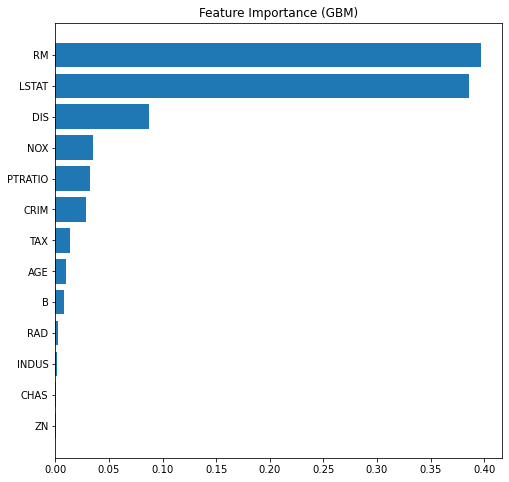

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Get Feature importance data using feature_importances_ attribute
feature_importance = gbr.feature_importances_

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(bhp.feature_names)[sorted_idx])
plt.title('Feature Importance (GBM)')


plt.show()

###  XGBoost - Extreme Gradient Boosting

O algoritmo XGBoost é uma extensão do GBM (Gradient Boosting Method) que permite trabalhar com multithreading em uma única máquina e processamento paralelo em um cluster de vários servidores. A principal vantagem do XGBoost sobre o GBM é sua capacidade de gerenciar dados esparsos. O XGBoost automaticamente aceita dados esparsos como input sem armazenar zeros na memória.

Principais vantagens do XGBoost:

1- Aceita dados esparsos (o que permite trabalhar com matrizes esparsas), sem a necessidade de conversão para matrizes densas.

2- Constrói uma árvore de aprendizagem utilizando um moderno método de split (chamado quatile sketch), o que resulta em tempo de processamento muito menor que métodos tradicionais.

3- Permite computação paralela em uma única máquina (através do uso de multithreading) e processamento paralelo em máquinas distribuídas em cluster.

Basicamente o XGBoost utiliza os mesmos parâmetros do GBM e permite tratamento avançado de dados missing.

O XGBoost é muito utilizado por **Cientistas de Dados que vencem competições no Kaggle**. Repositório no Github: https://github.com/dmlc/XGBoost

#### Instalar XGBoost a partir do PyPi
!pip install xgboost

In [22]:
#!pip install xgboost

In [35]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Carregando os dados
arquivo = 'pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo o tamanho dos dados de treino e de teste
teste_size = 0.10
seed = 7

# Criando o dataset de treino e de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

# Criando o modelo
#n_jobs=-1, usa todas as máquinas que estão no cluster.
modelo = XGBClassifier(n_estimators=8,n_jobs=-1)

# Treinando o modelo
modelo.fit(X_treino, y_treino)

# Pront do modelo
print(modelo)

# Fazendo previsões
y_pred = modelo.predict(X_teste)
previsoes = [round(value) for value in y_pred]

# Avaliando as previsões
accuracy = accuracy_score(y_teste, previsoes)
print("Acurácia: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=8, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Acurácia: 80.52%


![](https://cienciadosdados.com/images/2021/Thumbs/XGB.png)

### Light GBM

![](https://cienciadosdados.com/images/2021/Thumbs/LGB.png)

### CatBoost

![](https://cienciadosdados.com/images/2021/Thumbs/Catboost.png)

# **==> Stacking**

![](https://media1.tenor.com/images/2d2df35d4a6d21016f910aa90d017fba/tenor.gif?itemid=13079632)

Um aprendizado de máquina de conjunto **Voting Ensemble** 
combina as previsões de vários outros modelos. É uma
técnica que pode ser usada para melhorar o desempenho do modelo, idealmente alcançando um melhor desempenho
do que qualquer modelo único usado no conjunto. 

Um **Voting Ensemble** funciona combinando o
previsões de vários modelos. Pode ser usado para classificação ou regressão. No caso de
**regressão, isso envolve o cálculo da média das previsões** dos modelos. 

Para Problemas de **classificação, as previsões para cada rótulo são tomadas como votos** e somadas, onde o rótulo
com mais votos é previsto, ou seja, a votação leva o rótulo da classe que recebe o maior número de votos
como o vencedor final.



Existem duas abordagens para a previsão com Voting para classificação

A **Hard Voting** envolve somar as previsões para cada rótulo de classe e prever o rótulo da classe com mais votos. 

A **Soft Voting** envolve somar as probabilidades para cada rótulo de classe e prever o rótulo de classe com
a maior probabilidade.

* Hard Voting: Preveja a classe com a maior soma de votos dos modelos.
* Soft Voting: Preveja a classe com a maior probabilidade somada dos modelos.

In [ ]:
...Exemplo
models = [('lr',LogisticRegression()),('svm',SVC())]
ensemble = VotingClassifier(estimators=models)

In [ ]:
# synthetic binary classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
random_state=2)
# summarize the dataset
print(X.shape, y.shape)

In [ ]:
# get a list of standalone models to evaluate
def get_models():
 
  models = dict()
  # define the number of neighbors to consider
  neighbors = [1, 3, 5, 7, 9]

  for n in neighbors:
  key = 'knn' + str(n)
  models[key] = KNeighborsClassifier(n_neighbors=n)

  # define the voting ensemble
  members = [(n,m) for n,m in models.items()]
  models['hard_voting'] = VotingClassifier(estimators=members, voting='hard')
  
  return models

In [ ]:
# compare hard voting to standalone classifiers
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot
# get the dataset
def get_dataset():
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
n_redundant=5, random_state=2)
return X, y
# get a list of standalone models to evaluate
def get_models():
models = dict()
# define the number of neighbors to consider
neighbors = [1, 3, 5, 7, 9]
for n in neighbors:
  key = 'knn' + str(n)
models[key] = KNeighborsClassifier(n_neighbors=n)
# define the voting ensemble
members = [(n,m) for n,m in models.items()]
models['hard_voting'] = VotingClassifier(estimators=members, voting='hard')
return models
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the results
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
return scores
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
# evaluate the model
scores = evaluate_model(model, X, y)
# store the results
results.append(scores)
names.append(name)
# summarize the performance along the way
print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


# **Método Ensemble para Seleção de Variáveis**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

Quanto maior o score, maior a importância do atributo.

In [ ]:
# Importância do Atributo com o Extra Trees Classifier

# Import dos Módulos
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

# Carregando os dados
arquivo = 'pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Criação do Modelo - Feature Selection
modelo = ExtraTreesClassifier()
modelo.fit(X, Y)

# Print dos Resultados
print(dados.columns[0:8])
print(modelo.feature_importances_)

# **Salvando as Máquinas Preditivas**

In [ ]:
# Salvando o resultado do seu trabalho
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle
import warnings
warnings.filterwarnings('ignore')

# Carregando os dados
arquivo = 'pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo o tamanho dos dados de treino e de teste
teste_size = 0.33
seed = 7

# Criando o dataset de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()

# Treinando o modelo
modelo.fit(X_treino, Y_treino)

# Salvando o modelo
arquivo = 'modelo_classificador_final.sav'
pickle.dump(modelo, open(arquivo, 'wb'))
print("Modelo salvo!")

# Carregando o arquivo
modelo_classificador_final = pickle.load(open(arquivo, 'rb'))
modelo_prod = modelo_classificador_final.score(X_teste, Y_teste)
print("Modelo carregado!")

# Print do resultado
print("Acurácia: %.3f" % (modelo_prod.mean() * 100))


### # **Material Complementar e de Referência**
##### https://www.analyticsvidhya.com/blog/2021/03/basic-ensemble-technique-in-machine-learning/

##### https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/

